# This notebook is created for the analysis of Customer 1 on WD Brand and the Competitor's SPC Brand

### BUSINESS PROBLEM: 
The company is one of the leading household cleaning supplies brand in US and
sells products under the ‘WD Brand’. Another competitor in the same line of business is ‘SPC Brand’.
The company has 3 major customers – Customer 1, Customer 2 and Customer 3 and the business
requirement is to identify the pricing dynamics for ‘WD’ Brand of products.

Problem statement: 

To identify the pricing dynamics for a leading household cleaning supplies brand.
• What is Brand’s total U.S. price elasticity?

• Create a robust imputation logic where price data is missing.

• Is the price elasticity increasing or decreasing over time?

• Which customer segment are most price elastic?

• What is the impact of key competitor’s pricing on the target brand?

• Create price elasticity curves by key customer segments / time periods? (Elasticity may
differ at different price points and we would like to change in elasticity.)

In [1]:
#Importing all the libraries for Data Manipulation and Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the libraries for Linear Regression modelling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#Importing the dataset into dataframe
cust1=pd.read_excel("Project_Dataset.xlsx",sheet_name="Customer1")

### (i) Checking the raw data

In [4]:
cust1.head()

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold
0,2015-04-24,1493,1001,OH,45750.0,11040,811,WD017,2,12.9800
1,2015-04-24,1493,1002,OH,43912.0,11016,811,WD009,1,5.4900
2,2015-04-24,1493,1002,OH,43912.0,11040,811,WD017,8,48.6696
3,2015-04-24,1493,1003,OH,43130.0,11016,811,WD009,1,5.4900
4,2015-04-24,1493,1004,OH,43906.0,11040,811,WD017,2,12.9800


In [5]:
cust1.tail()

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold
361382,2016-06-17,1493,9965,PA,18045.0,49002,811,WD029,1,7.99
361383,2016-06-17,1493,9968,NY,14454.0,49006,811,WD017,4,19.96
361384,2016-06-17,1493,9968,NY,14454.0,11016,811,WD009,1,5.49
361385,2016-06-17,1493,9982,IN,46545.0,11016,811,WD009,3,15.87
361386,2016-06-17,1493,9982,IN,46545.0,49002,811,WD029,2,9.98


In [6]:
#Number of rows and columns
cust1.shape

(361387, 10)

In [7]:
#Additional info about dataframe
cust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361387 entries, 0 to 361386
Data columns (total 10 columns):
EndDate           361387 non-null datetime64[ns]
CustomerNumber    361387 non-null int64
StoreNumber       361387 non-null int64
StateTerritory    360762 non-null object
PostalCode        360762 non-null float64
PartNumber        361387 non-null object
ProdRptCat        361387 non-null int64
PRODSTYLE         361387 non-null object
UnitsSold         361387 non-null int64
AmtSold           361387 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 27.6+ MB


In [8]:
#Get Statistical description for the Numeric columns
cust1.describe()

,CustomerNumber,StoreNumber,PostalCode,ProdRptCat,UnitsSold,AmtSold
count,361387.0,361387.000000,360762.000000,361387.000000,361387.000000,361387.000000
mean,1493.0,6572.218694,39256.151291,814.399170,2.276250,11.987530
std,0.0,2343.967238,19330.549943,8.368149,2.358178,11.882402
min,1493.0,1001.000000,6460.000000,811.000000,1.000000,-324.960000
25%,1493.0,5378.000000,27055.000000,811.000000,1.000000,5.490000
50%,1493.0,6767.000000,33401.000000,811.000000,2.000000,7.999800
75%,1493.0,8608.000000,48088.000000,811.000000,3.000000,14.929800
max,1493.0,9982.000000,98300.000000,835.000000,242.000000,856.570000


In [9]:
#Get the datatypes for each column
cust1.dtypes

EndDate           datetime64[ns]
CustomerNumber             int64
StoreNumber                int64
StateTerritory            object
PostalCode               float64
PartNumber                object
ProdRptCat                 int64
PRODSTYLE                 object
UnitsSold                  int64
AmtSold                  float64
dtype: object

## (ii) Data Cleaning and Preparation

In [10]:
#Verifying the null rows
cust1['UnitsSold'].isnull().sum()

0

In [11]:
#Dropping the null values
cust1.dropna(inplace=True)

In [12]:
cust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360762 entries, 0 to 361386
Data columns (total 10 columns):
EndDate           360762 non-null datetime64[ns]
CustomerNumber    360762 non-null int64
StoreNumber       360762 non-null int64
StateTerritory    360762 non-null object
PostalCode        360762 non-null float64
PartNumber        360762 non-null object
ProdRptCat        360762 non-null int64
PRODSTYLE         360762 non-null object
UnitsSold         360762 non-null int64
AmtSold           360762 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 30.3+ MB


### Now we have removed all the null values. Let's check for the negative and zero values in the data

In [13]:
# Get the negative and zero values for UnitsSold
cust1[(cust1['UnitsSold']<=0) | (cust1['AmtSold']<=0)]

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold
693,2015-04-24,1493,2330,VA,23222.0,11016,811,WD009,1,0.0
735,2015-04-24,1493,2500,VA,23434.0,11040,811,WD017,2,0.0
939,2015-04-24,1493,3730,TN,38237.0,11040,811,WD017,1,0.0
1457,2015-04-24,1493,5157,LA,71118.0,11016,811,WD009,1,0.0
1586,2015-04-24,1493,5272,IN,46176.0,11016,811,WD009,1,0.0
...,...,...,...,...,...,...,...,...,...,...
360660,2016-06-17,1493,9173,FL,33071.0,49002,811,WD029,1,0.0
360824,2016-06-17,1493,9281,FL,32257.0,11016,811,WD009,1,0.0
361049,2016-06-17,1493,9466,FL,32765.0,11016,811,WD009,1,0.0
361070,2016-06-17,1493,9492,FL,33157.0,49006,811,WD017,1,0.0


In [14]:
#Removing the above 3742 rows 
cust1.drop(cust1[(cust1['UnitsSold']<=0) | (cust1['AmtSold']<=0)].index,inplace=True)


In [15]:
#Verify the above operation 
cust1[(cust1['UnitsSold']<=0) | (cust1['AmtSold']<=0)]

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold


#### So now we have removed all the missing values, negative and zero units sold and amount sold

## (iii) Creating new Column for Unit Price 

In [16]:
cust1['UnitPrice']=cust1['AmtSold']/cust1['UnitsSold']

In [17]:
cust1.head()

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
0,2015-04-24,1493,1001,OH,45750.0,11040,811,WD017,2,12.9800,6.4900
1,2015-04-24,1493,1002,OH,43912.0,11016,811,WD009,1,5.4900,5.4900
2,2015-04-24,1493,1002,OH,43912.0,11040,811,WD017,8,48.6696,6.0837
3,2015-04-24,1493,1003,OH,43130.0,11016,811,WD009,1,5.4900,5.4900
4,2015-04-24,1493,1004,OH,43906.0,11040,811,WD017,2,12.9800,6.4900


In [18]:
# Creating a copy
cust1ini=cust1.copy()

In [19]:
#Separating the Brand Data
cust1.drop(['PostalCode','ProdRptCat','StoreNumber','CustomerNumber','StateTerritory','PartNumber'],axis=1, inplace=True)
cust1_WD=cust1[cust1['PRODSTYLE'].str.startswith('WD')]
cust1_SP=cust1[cust1['PRODSTYLE'].str.startswith('SP')]

In [20]:
cust1_WD.head()

,EndDate,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
0,2015-04-24,WD017,2,12.9800,6.4900
1,2015-04-24,WD009,1,5.4900,5.4900
2,2015-04-24,WD017,8,48.6696,6.0837
3,2015-04-24,WD009,1,5.4900,5.4900
4,2015-04-24,WD017,2,12.9800,6.4900


In [21]:
cust1_SP.head()

,EndDate,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
8,2015-04-24,SPC13,2,14.78,7.39
14,2015-04-24,SPC11,1,6.99,6.99
25,2015-04-24,SPC11,2,13.32,6.66
29,2015-04-24,SPC13,1,7.39,7.39
34,2015-04-24,SPC13,1,6.99,6.99


In [22]:
#Get the unique Subproducts of WD
cust1_WD['PRODSTYLE'].unique()

array(['WD017', 'WD009', 'WD029', 'WD012'], dtype=object)

In [23]:
#Get the unique Subproducts of SP
cust1_SP['PRODSTYLE'].unique()

array(['SPC13', 'SPC11', 'SP001'], dtype=object)

### Creating Subproducts Dataframes

In [24]:
cust1_WD009=cust1_WD[cust1_WD['PRODSTYLE']=='WD009']
cust1_WD009.columns=['EndDate','WD009','WD009UnitsSold','WD009AmtSold','WD009UnitPrice']
cust1_WD009.head()

,EndDate,WD009,WD009UnitsSold,WD009AmtSold,WD009UnitPrice
1,2015-04-24,WD009,1,5.49,5.49
3,2015-04-24,WD009,1,5.49,5.49
5,2015-04-24,WD009,1,5.49,5.49
9,2015-04-24,WD009,2,10.98,5.49
10,2015-04-24,WD009,1,5.49,5.49


In [25]:
cust1_WD009.drop(['WD009'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
cust1_WD012=cust1_WD[cust1_WD['PRODSTYLE']=='WD012']
cust1_WD012.columns=['EndDate','WD012','WD012UnitsSold','WD012AmtSold','WD012UnitPrice']
cust1_WD012.head()

,EndDate,WD012,WD012UnitsSold,WD012AmtSold,WD012UnitPrice
324252,2016-04-29,WD012,1,9.99,9.99
345467,2016-05-27,WD012,1,9.99,9.99
356632,2016-06-17,WD012,1,4.99,4.99
357325,2016-06-17,WD012,1,9.99,9.99
357350,2016-06-17,WD012,1,9.99,9.99


In [27]:
cust1_WD012.drop(['WD012'],axis=1,inplace=True)

In [28]:
cust1_WD029=cust1_WD[cust1_WD['PRODSTYLE']=='WD029']
cust1_WD029.columns=['EndDate','WD029','WD029UnitsSold','WD029AmtSold','WD029UnitPrice']
cust1_WD029.head(10)

,EndDate,WD029,WD029UnitsSold,WD029AmtSold,WD029UnitPrice
188620,2015-11-20,WD029,1,3.99,3.99
325029,2016-04-29,WD029,1,4.00,4.00
352070,2016-06-10,WD029,1,7.99,7.99
352091,2016-06-10,WD029,1,7.99,7.99
352116,2016-06-10,WD029,1,7.99,7.99
352240,2016-06-10,WD029,1,7.99,7.99
352286,2016-06-10,WD029,2,15.98,7.99
352399,2016-06-10,WD029,2,15.98,7.99
352569,2016-06-10,WD029,1,7.99,7.99
352611,2016-06-10,WD029,1,7.99,7.99


In [29]:
cust1_WD029.drop(['WD029'],axis=1,inplace=True)

In [30]:
cust1_WD017=cust1_WD[cust1_WD['PRODSTYLE']=='WD017']
cust1_WD017.columns=['EndDate','WD017','WD017UnitsSold','WD017AmtSold','WD017UnitPrice']
cust1_WD017.head()

,EndDate,WD017,WD017UnitsSold,WD017AmtSold,WD017UnitPrice
0,2015-04-24,WD017,2,12.9800,6.4900
2,2015-04-24,WD017,8,48.6696,6.0837
4,2015-04-24,WD017,2,12.9800,6.4900
6,2015-04-24,WD017,2,12.9800,6.4900
7,2015-04-24,WD017,1,6.4900,6.4900


In [31]:
cust1_WD017.drop(['WD017'],axis=1,inplace=True)

In [32]:
cust1_SP001=cust1_SP[cust1_SP['PRODSTYLE']=='SP001']
cust1_SP001.columns=['EndDate','SP001','SP001UnitsSold','SP001AmtSold','SP001UnitPrice']
cust1_SP001.head()

,EndDate,SP001,SP001UnitsSold,SP001AmtSold,SP001UnitPrice
11605,2015-05-01,SP001,1,1.00,1.00
12636,2015-05-01,SP001,2,0.10,0.05
33251,2015-05-29,SP001,2,0.10,0.05
33420,2015-05-29,SP001,1,5.00,5.00
48188,2015-06-12,SP001,2,21.98,10.99


In [33]:
cust1_SP001.drop(['SP001'],axis=1,inplace=True)

In [34]:
cust1_SP001.head()

,EndDate,SP001UnitsSold,SP001AmtSold,SP001UnitPrice
11605,2015-05-01,1,1.00,1.00
12636,2015-05-01,2,0.10,0.05
33251,2015-05-29,2,0.10,0.05
33420,2015-05-29,1,5.00,5.00
48188,2015-06-12,2,21.98,10.99


In [35]:
cust1_SPC11=cust1_SP[cust1_SP['PRODSTYLE']=='SPC11']
cust1_SPC11.columns=['EndDate','SPC11','SPC11UnitsSold','SPC11AmtSold','SPC11UnitPrice']
cust1_SPC11.head()

,EndDate,SPC11,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice
14,2015-04-24,SPC11,1,6.99,6.99
25,2015-04-24,SPC11,2,13.32,6.66
46,2015-04-24,SPC11,1,6.99,6.99
54,2015-04-24,SPC11,1,6.99,6.99
62,2015-04-24,SPC11,1,6.99,6.99


In [36]:
cust1_SPC11.drop(['SPC11'],axis=1,inplace=True)

In [37]:
cust1_SPC11

,EndDate,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice
14,2015-04-24,1,6.99,6.99
25,2015-04-24,2,13.32,6.66
46,2015-04-24,1,6.99,6.99
54,2015-04-24,1,6.99,6.99
62,2015-04-24,1,6.99,6.99
...,...,...,...,...
357821,2016-06-17,1,0.05,0.05
359291,2016-06-17,1,0.10,0.10
359327,2016-06-17,1,0.05,0.05
359531,2016-06-17,1,1.50,1.50


In [38]:
cust1_SPC13=cust1_SP[cust1_SP['PRODSTYLE']=='SPC13']
cust1_SPC13.columns=['EndDate','SPC13','SPC13UnitsSold','SPC13AmtSold','SPC13UnitPrice']
cust1_SPC13.head()

,EndDate,SPC13,SPC13UnitsSold,SPC13AmtSold,SPC13UnitPrice
8,2015-04-24,SPC13,2,14.78,7.39
29,2015-04-24,SPC13,1,7.39,7.39
34,2015-04-24,SPC13,1,6.99,6.99
37,2015-04-24,SPC13,2,14.78,7.39
43,2015-04-24,SPC13,1,7.39,7.39


In [39]:
cust1_SPC13.drop(['SPC13'],axis=1,inplace=True)

In [40]:
cust1_SPC13

,EndDate,SPC13UnitsSold,SPC13AmtSold,SPC13UnitPrice
8,2015-04-24,2,14.78,7.39
29,2015-04-24,1,7.39,7.39
34,2015-04-24,1,6.99,6.99
37,2015-04-24,2,14.78,7.39
43,2015-04-24,1,7.39,7.39
...,...,...,...,...
359292,2016-06-17,2,0.20,0.10
359325,2016-06-17,1,0.05,0.05
359532,2016-06-17,1,1.50,1.50
359712,2016-06-17,4,0.20,0.05


In [41]:
## (iv) Exploratory Data Analysis

In [42]:
cust1ini.corr()

,CustomerNumber,StoreNumber,PostalCode,ProdRptCat,UnitsSold,AmtSold,UnitPrice
CustomerNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StoreNumber,NaN,1.000000,0.026305,-0.013006,0.026658,0.026243,-0.001748
PostalCode,NaN,0.026305,1.000000,-0.014732,-0.007468,-0.008872,-0.015309
ProdRptCat,NaN,-0.013006,-0.014732,1.000000,-0.180309,-0.166513,0.237485
UnitsSold,NaN,0.026658,-0.007468,-0.180309,1.000000,0.947458,-0.118936
AmtSold,NaN,0.026243,-0.008872,-0.166513,0.947458,1.000000,0.063574
UnitPrice,NaN,-0.001748,-0.015309,0.237485,-0.118936,0.063574,1.000000


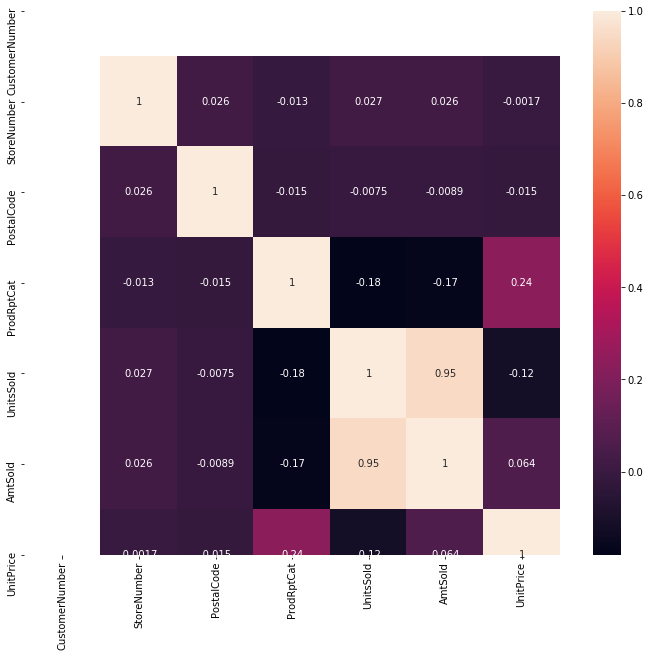

In [43]:
figure=plt.figure(figsize=(12,10))
sns.heatmap(cust1ini.corr(),annot=True)

## We can see that 'Amt Price' and 'Units Sold' are highly correlated

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Price')

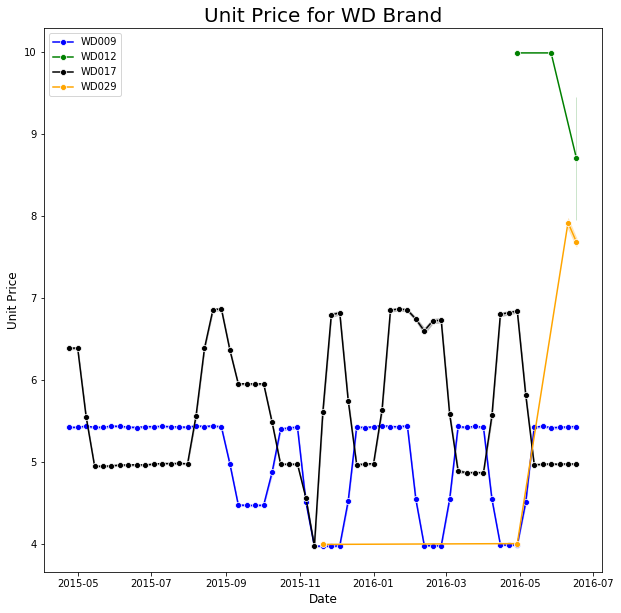

In [44]:
fig,ax=plt.subplots(figsize=(10,10))
x1=cust1_WD009['EndDate']
y1=cust1_WD009['WD009UnitPrice']
x2=cust1_WD012['EndDate']
y2=cust1_WD012['WD012UnitPrice']
x3=cust1_WD017['EndDate']
y3=cust1_WD017['WD017UnitPrice']
x4=cust1_WD029['EndDate']
y4=cust1_WD029['WD029UnitPrice']
plt.title('Unit Price for WD Brand',fontsize=20)
ax=sns.lineplot(x1,y1,ax=ax,color='blue',marker='o',label='WD009')
ax=sns.lineplot(x2,y2,ax=ax,color='green',marker='o',label='WD012')
ax=sns.lineplot(x3,y3,ax=ax,color='black',marker='o',label='WD017')
ax=sns.lineplot(x4,y4,ax=ax,color='orange',marker='o',label='WD029')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Unit Price',fontsize=12)

Text(0, 0.5, 'Units Sold ')

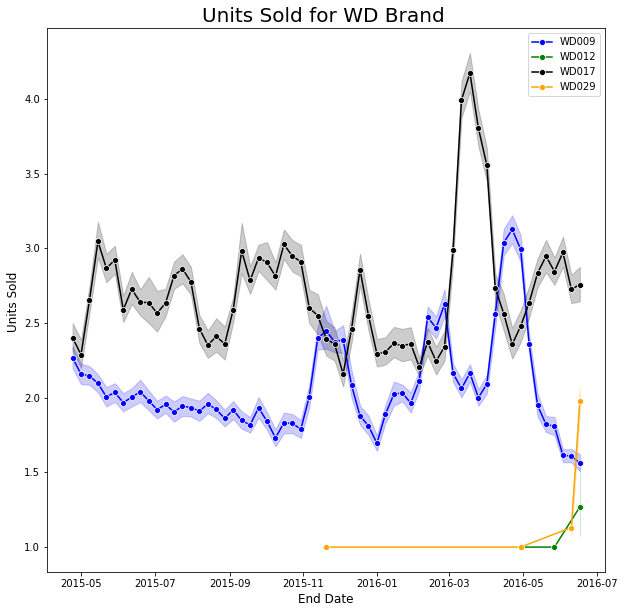

In [45]:
fig,ax=plt.subplots(figsize=(10,10))

x1=cust1_WD009['EndDate']
y1=cust1_WD009['WD009UnitsSold']
x2=cust1_WD012['EndDate']
y2=cust1_WD012['WD012UnitsSold']
x3=cust1_WD017['EndDate']
y3=cust1_WD017['WD017UnitsSold']
x4=cust1_WD029['EndDate']
y4=cust1_WD029['WD029UnitsSold']
plt.title('Units Sold for WD Brand ',fontsize=20)
ax=sns.lineplot(x1,y1,ax=ax,color='blue',marker='o',label='WD009')
ax=sns.lineplot(x2,y2,ax=ax,color='green',marker='o',label='WD012')
ax=sns.lineplot(x3,y3,ax=ax,color='black',marker='o',label='WD017')
ax=sns.lineplot(x4,y4,ax=ax,color='orange',marker='o',label='WD029')
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Units Sold ',fontsize=12)


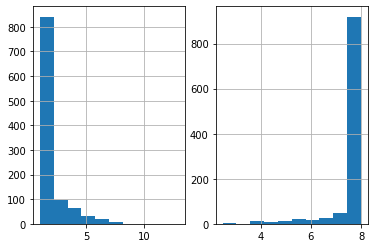

In [239]:
fig,(ax1,ax2)=plt.subplots(1,2)
cust1_WD029['WD029UnitsSold'].hist(ax=ax1)
cust1_WD029['WD029UnitPrice'].hist(ax=ax2)

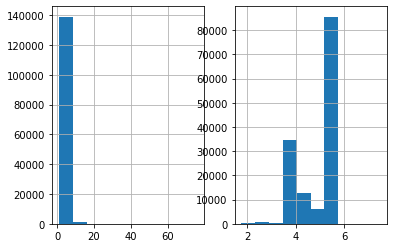

In [247]:
fig,(ax1,ax2)=plt.subplots(1,2)
cust1_WD009['WD009UnitsSold'].hist(ax=ax1)
cust1_WD009['WD009UnitPrice'].hist(ax=ax2)

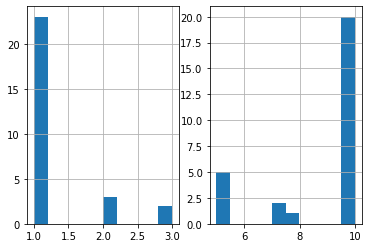

In [48]:
fig,(ax1,ax2)=plt.subplots(1,2)
cust1_WD012['WD012UnitsSold'].hist(ax=ax1)
cust1_WD012['WD012UnitPrice'].hist(ax=ax2)

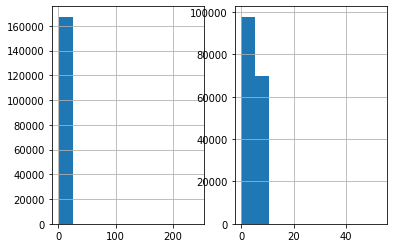

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2)
cust1_WD017['WD017UnitsSold'].hist(ax=ax1)
cust1_WD017['WD017UnitPrice'].hist(ax=ax2)

Text(0.5, 1.0, 'WD029 Unit Price Box Plot')

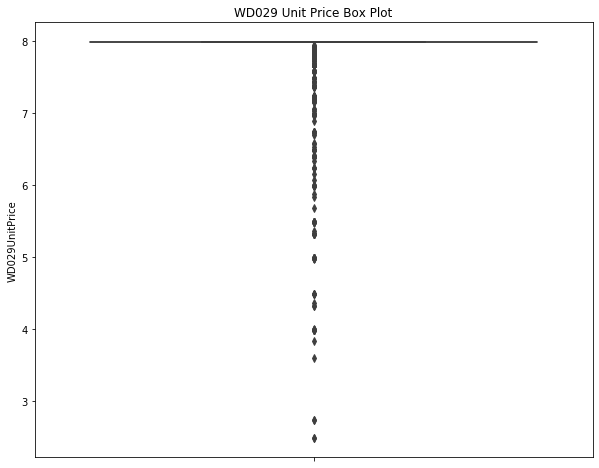

In [50]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust1_WD029['WD029UnitPrice'])
plt.title('WD029 Unit Price Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD029 Units Sold Box Plot')

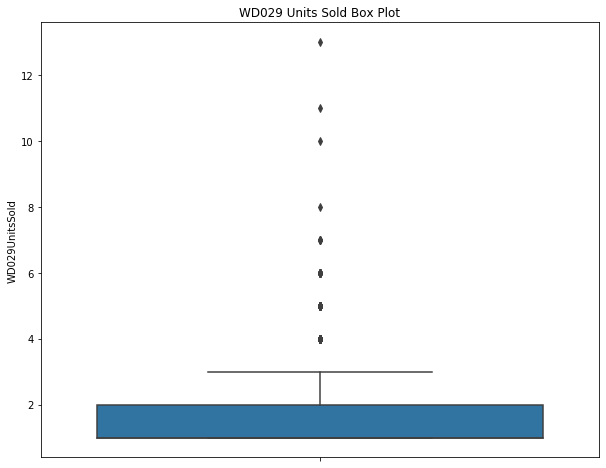

In [51]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust1_WD029['WD029UnitsSold'])
plt.title('WD029 Units Sold Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD009 Unit Price Box Plot')

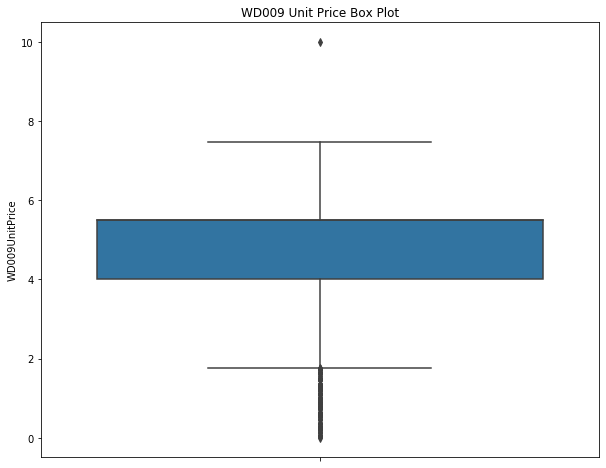

In [52]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust1_WD009['WD009UnitPrice'])
plt.title('WD009 Unit Price Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD009 Units Sold Box Plot')

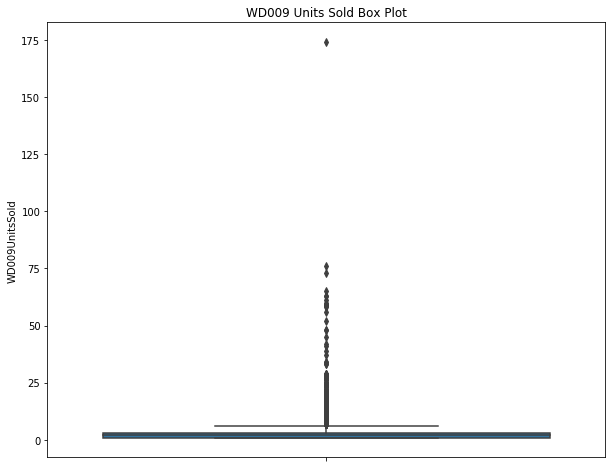

In [53]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust1_WD009['WD009UnitsSold'])
plt.title('WD009 Units Sold Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD012 Unit Price Box Plot')

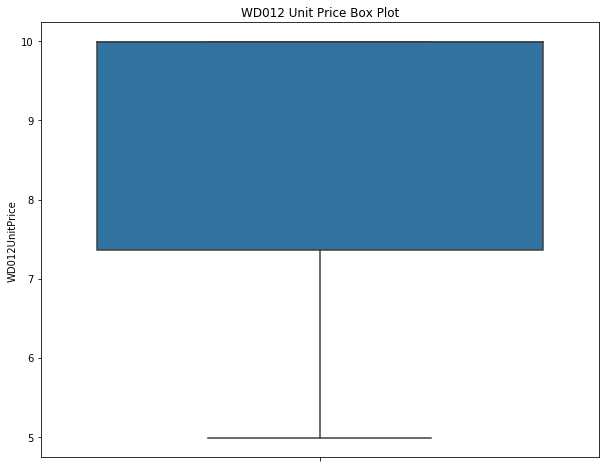

In [54]:
fig=plt.subplots(figsize=(10,8))
ax=sns.boxplot(y=cust1_WD012['WD012UnitPrice'])
plt.title('WD012 Unit Price Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD012 Units Sold Box Plot')

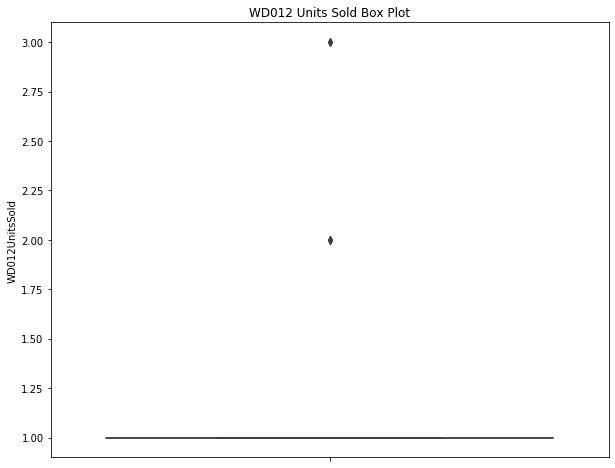

In [55]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust1_WD012['WD012UnitsSold'])
plt.title('WD012 Units Sold Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD017 Unit Price Box Plot')

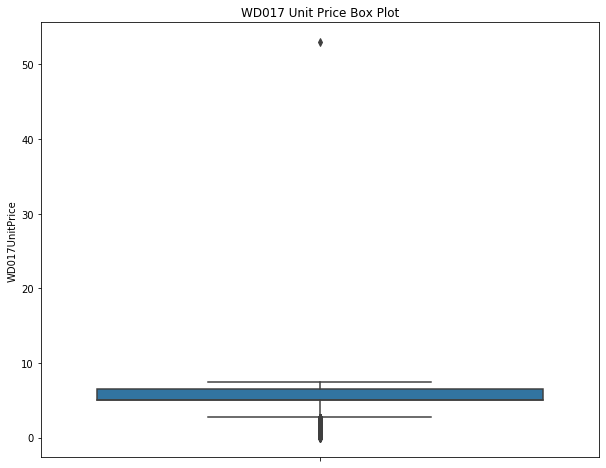

In [56]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust1_WD017['WD017UnitPrice'])
plt.title('WD017 Unit Price Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD017 Units Sold Box Plot')

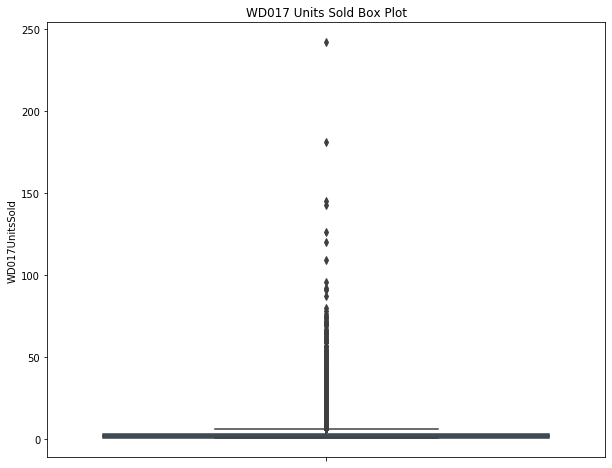

In [57]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust1_WD017['WD017UnitsSold'])
plt.title('WD017 Units Sold Box Plot',fontsize=12)

Text(0, 0.5, 'UnitsSold')

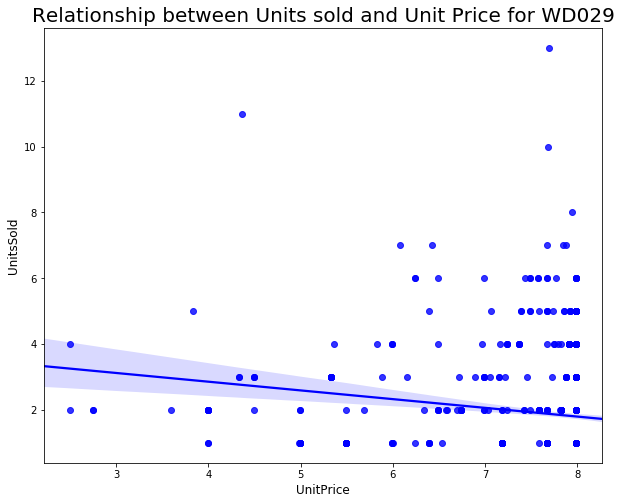

In [58]:
fig=plt.figure(figsize=(10,8))
x=cust1_WD029['WD029UnitPrice']
y=cust1_WD029['WD029UnitsSold']
sns.regplot(x,y, color = 'blue')
plt.title('Relationship between Units sold and Unit Price for WD029',fontsize=20)
plt.xlabel('UnitPrice',fontsize=12)
plt.ylabel('UnitsSold',fontsize=12)

Text(0, 0.5, 'UnitsSold')

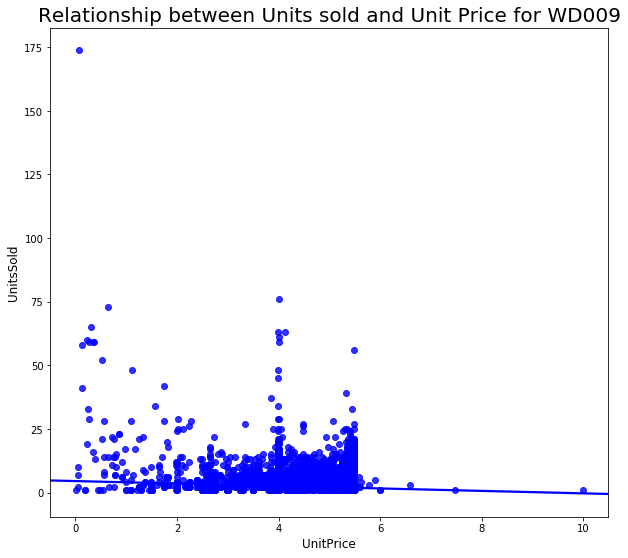

In [59]:
fig=plt.figure(figsize=(10,9))
x=cust1_WD009['WD009UnitPrice']
y=cust1_WD009['WD009UnitsSold']
sns.regplot(x,y, color = 'blue')
plt.title('Relationship between Units sold and Unit Price for WD009',fontsize=20)
plt.xlabel('UnitPrice',fontsize=12)
plt.ylabel('UnitsSold',fontsize=12)

Text(0, 0.5, 'UnitsSold')

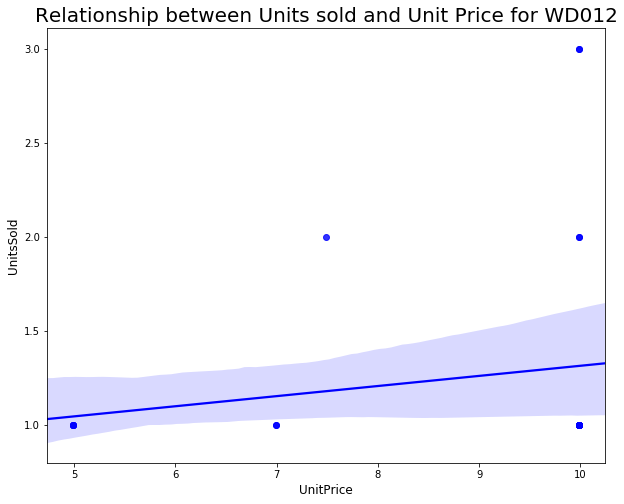

In [60]:
fig=plt.figure(figsize=(10,8))
x=cust1_WD012['WD012UnitPrice']
y=cust1_WD012['WD012UnitsSold']
sns.regplot(x,y, color = 'blue')
plt.title('Relationship between Units sold and Unit Price for WD012',fontsize=20)
plt.xlabel('UnitPrice',fontsize=12)
plt.ylabel('UnitsSold',fontsize=12)

Text(0, 0.5, 'UnitsSold')

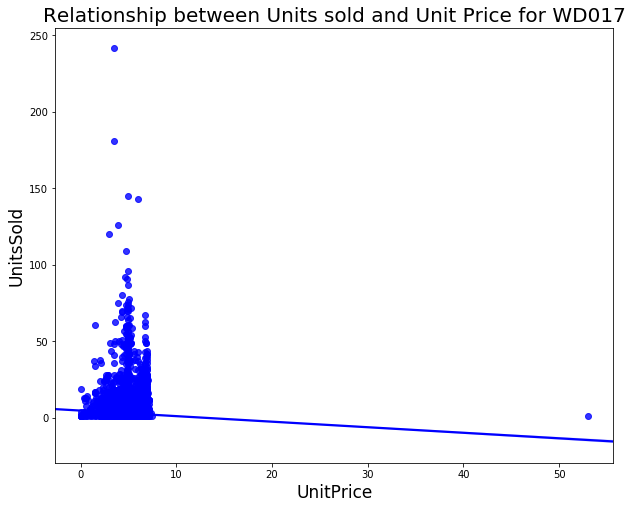

In [61]:
fig=plt.figure(figsize=(10,8))
x=cust1_WD017['WD017UnitPrice']
y=cust1_WD017['WD017UnitsSold']
sns.regplot(x,y, color = 'blue')
plt.title('Relationship between Units sold and Unit Price for WD017',fontsize=20)
plt.xlabel('UnitPrice',fontsize=17)
plt.ylabel('UnitsSold',fontsize=17)

## (iv) Finding the outliers in each of the Products through IQR

In [62]:
cust1_WD029.describe()

,WD029UnitsSold,WD029AmtSold,WD029UnitPrice
count,1059.000000,1059.000000,1059.000000
mean,1.877243,14.288293,7.701387
std,1.339399,9.999240,0.799674
min,1.000000,3.990000,2.495000
25%,1.000000,7.990000,7.990000
50%,1.000000,7.990000,7.990000
75%,2.000000,15.980000,7.990000
max,13.000000,100.029800,7.990000


In [63]:
cust1_WD029_Q1=cust1_WD029['WD029UnitPrice'].quantile(0.25)
print("Quantile 1:",cust1_WD029_Q1)

cust1_WD029_Q3=cust1_WD029['WD029UnitPrice'].quantile(0.75)
print("Quantile 3:",cust1_WD029_Q3)

cust1_WD029_Q3_IQR=cust1_WD029_Q3-cust1_WD029_Q1
print("IQR",cust1_WD029_Q3_IQR)

Quantile 1: 7.989999999999999
Quantile 3: 7.99
IQR 8.881784197001252e-16


In [64]:
upperrange=cust1_WD029_Q3+(cust1_WD029_Q3_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=cust1_WD029_Q1-(cust1_WD029_Q3_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 7.990000000000002
Lower Range: 7.989999999999998


In [65]:
#As the upper and lower range are coming same. Hence not removing any values

In [66]:
cust1_WD009.describe()

,WD009UnitsSold,WD009AmtSold,WD009UnitPrice
count,140232.000000,140232.000000,140232.000000
mean,2.111743,10.264833,4.968130
std,1.820074,7.857860,0.685192
min,1.000000,0.010000,0.010000
25%,1.000000,5.490000,4.000000
50%,2.000000,7.980000,5.490000
75%,3.000000,11.970000,5.490000
max,174.000000,307.216000,9.990000


In [67]:
cust1_WD009_Q1=cust1_WD009['WD009UnitPrice'].quantile(0.25)
print("Quantile 1:",cust1_WD009_Q1)

cust1_WD009_Q3=cust1_WD009['WD009UnitPrice'].quantile(0.75)
print("Quantile 3:",cust1_WD009_Q3)

cust1_WD009_Q3_IQR=cust1_WD009_Q3-cust1_WD009_Q1
print("IQR",cust1_WD009_Q3_IQR)

Quantile 1: 4.0
Quantile 3: 5.49
IQR 1.4900000000000002


In [68]:
upperrange=cust1_WD009_Q3+(cust1_WD009_Q3_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=cust1_WD009_Q1-(cust1_WD009_Q3_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 7.7250000000000005
Lower Range: 1.7649999999999997


In [69]:
cust1_WD009[(cust1_WD009['WD009UnitPrice']>7.725)|(cust1_WD009['WD009UnitPrice']<1.765)]

,EndDate,WD009UnitsSold,WD009AmtSold,WD009UnitPrice
3943,2015-04-24,2,2.6000,1.3000
6015,2015-04-24,52,26.8996,0.5173
13862,2015-05-08,1,1.5000,1.5000
21360,2015-05-15,3,5.2599,1.7533
24631,2015-05-15,1,1.1000,1.1000
...,...,...,...,...
341240,2016-05-20,1,1.4900,1.4900
343298,2016-05-27,21,10.9788,0.5228
344031,2016-05-27,1,1.4900,1.4900
350674,2016-06-03,6,5.4900,0.9150


In [70]:
#Removing the above rows for Unit Price
cust1_WD009.drop(cust1_WD009[(cust1_WD009['WD009UnitPrice']>7.725)|(cust1_WD009['WD009UnitPrice']<1.765)].index,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
cust1_WD017_Q1=cust1_WD017['WD017UnitPrice'].quantile(0.25)
print("Quantile 1:",cust1_WD017_Q1)

cust1_WD017_Q3=cust1_WD017['WD017UnitPrice'].quantile(0.75)
print("Quantile 3:",cust1_WD017_Q3)

cust1_WD017_Q3_IQR=cust1_WD017_Q3-cust1_WD017_Q1
print("IQR",cust1_WD017_Q3_IQR)

Quantile 1: 4.99
Quantile 3: 6.49
IQR 1.5


In [72]:
upperrange=cust1_WD017_Q3+(cust1_WD017_Q3_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=cust1_WD017_Q1-(cust1_WD017_Q3_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 8.74
Lower Range: 2.74


In [73]:
cust1_WD017[(cust1_WD017['WD017UnitPrice']>8.74)|(cust1_WD017['WD017UnitPrice']<2.74)]

,EndDate,WD017UnitsSold,WD017AmtSold,WD017UnitPrice
833,2015-04-24,1,1.4900,1.4900
2407,2015-04-24,13,6.4896,0.4992
10211,2015-05-01,1,1.0000,1.0000
10422,2015-05-01,3,5.1900,1.7300
14101,2015-05-08,16,24.1888,1.5118
...,...,...,...,...
360195,2016-06-17,2,2.9900,1.4950
360462,2016-06-17,3,4.9899,1.6633
360521,2016-06-17,3,7.9800,2.6600
360691,2016-06-17,2,4.9900,2.4950


In [74]:
cust1_WD017.describe()

,WD017UnitsSold,WD017AmtSold,WD017UnitPrice
count,167517.000000,167517.000000,167517.000000
mean,2.741453,14.968505,5.569617
std,2.906700,15.051864,0.909906
min,1.000000,0.010000,0.010000
25%,1.000000,6.490000,4.990000
50%,2.000000,10.000000,5.000000
75%,3.000000,19.560000,6.490000
max,242.000000,856.570000,52.990000


In [75]:
#Dropping the above rows
cust1_WD017.drop(cust1_WD017[(cust1_WD017['WD017UnitPrice']>8.74)|(cust1_WD017['WD017UnitPrice']<2.74)].index,inplace=True)

In [76]:
cust1_WD012_Q1=cust1_WD012['WD012UnitPrice'].quantile(0.25)
print("Quantile 1:",cust1_WD012_Q1)

cust1_WD012_Q3=cust1_WD012['WD012UnitPrice'].quantile(0.75)
print("Quantile 3:",cust1_WD012_Q3)

cust1_WD012_Q3_IQR=cust1_WD012_Q3-cust1_WD012_Q1
print("IQR",cust1_WD012_Q3_IQR)

Quantile 1: 7.365
Quantile 3: 9.99
IQR 2.625


In [77]:
upperrange=cust1_WD012_Q3+(cust1_WD012_Q3_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=cust1_WD012_Q1-(cust1_WD012_Q3_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 13.9275
Lower Range: 3.4275


In [78]:
cust1_WD012[(cust1_WD012['WD012UnitPrice']>13.9275)|(cust1_WD012['WD012UnitPrice']<3.4275)]

,EndDate,WD012UnitsSold,WD012AmtSold,WD012UnitPrice


In [79]:
#No outliers for Unit Price for WD012

In [80]:
cust1_SP001_Q1=cust1_SP001['SP001UnitPrice'].quantile(0.25)
print("Quantile 1:",cust1_SP001_Q1)

cust1_SP001_Q3=cust1_SP001['SP001UnitPrice'].quantile(0.75)
print("Quantile 3:",cust1_SP001_Q3)

cust1_SP001_Q3_IQR=cust1_SP001_Q3-cust1_SP001_Q1
print("IQR",cust1_SP001_Q3_IQR)

Quantile 1: 0.05
Quantile 3: 1.6375000000000002
IQR 1.5875000000000001


In [81]:
upperrange=cust1_SP001_Q3+(cust1_SP001_Q3_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=cust1_SP001_Q1-(cust1_SP001_Q3_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 4.018750000000001
Lower Range: -2.3312500000000003


In [82]:
cust1_SP001[(cust1_SP001['SP001UnitPrice']>2.425)|(cust1_SP001['SP001UnitPrice']<-1.3749)]

,EndDate,SP001UnitsSold,SP001AmtSold,SP001UnitPrice
33420,2015-05-29,1,5.00,5.00
48188,2015-06-12,2,21.98,10.99
48423,2015-06-12,2,9.98,4.99
140227,2015-09-25,1,5.00,5.00
145254,2015-10-02,1,12.00,12.00
210288,2015-12-11,1,4.99,4.99
262157,2016-02-12,2,7.00,3.50


In [83]:
#Dropping the above rows
cust1_SP001.drop(cust1_SP001[(cust1_SP001['SP001UnitPrice']>2.425)|(cust1_SP001['SP001UnitPrice']<-1.3749)].index,inplace=True)

In [84]:
cust1_SPC11_Q1=cust1_SPC11['SPC11UnitPrice'].quantile(0.25)
print("Quantile 1:",cust1_SPC11_Q1)

cust1_SPC11_Q3=cust1_SPC11['SPC11UnitPrice'].quantile(0.75)
print("Quantile 3:",cust1_SPC11_Q3)

cust1_SPC11_Q3_IQR=cust1_SPC11_Q3-cust1_SPC11_Q1
print("IQR",cust1_SPC11_Q3_IQR)

Quantile 1: 5.45
Quantile 3: 6.99
IQR 1.54


In [85]:
upperrange=cust1_SPC11_Q3+(cust1_SPC11_Q3_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=cust1_SPC11_Q1-(cust1_SPC11_Q3_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 9.3
Lower Range: 3.14


In [86]:
cust1_SPC11[(cust1_SPC11['SPC11UnitPrice']>9.3)|(cust1_SPC11['SPC11UnitPrice']<3.14)]

,EndDate,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice
31962,2015-05-22,3,6.99,2.330
36659,2015-05-29,1,3.00,3.000
43793,2015-06-05,2,1.70,0.850
78600,2015-07-17,2,5.59,2.795
119200,2015-09-04,1,0.32,0.320
...,...,...,...,...
357821,2016-06-17,1,0.05,0.050
359291,2016-06-17,1,0.10,0.100
359327,2016-06-17,1,0.05,0.050
359531,2016-06-17,1,1.50,1.500


In [87]:
#Dropping the above rows
cust1_SPC11.drop(cust1_SPC11[(cust1_SPC11['SPC11UnitPrice']>9.3)|(cust1_SPC11['SPC11UnitPrice']<3.14)].index,inplace=True)

In [88]:
cust1_SPC13_Q1=cust1_SPC13['SPC13UnitPrice'].quantile(0.25)
print("Quantile 1:",cust1_SPC13_Q1)

cust1_SPC13_Q3=cust1_SPC13['SPC13UnitPrice'].quantile(0.75)
print("Quantile 3:",cust1_SPC13_Q3)

cust1_SPC13_Q3_IQR=cust1_SPC13_Q3-cust1_SPC13_Q1
print("IQR",cust1_SPC13_Q3_IQR)

Quantile 1: 5.75
Quantile 3: 7.39
IQR 1.6399999999999997


In [89]:
upperrange=cust1_SPC13_Q3+(cust1_SPC13_Q3_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=cust1_SPC13_Q1-(cust1_SPC13_Q3_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 9.85
Lower Range: 3.2900000000000005


In [90]:
cust1_SPC13[(cust1_SPC13['SPC13UnitPrice']>9.85)|(cust1_SPC13['SPC13UnitPrice']<3.29)]

,EndDate,SPC13UnitsSold,SPC13AmtSold,SPC13UnitPrice
3347,2015-04-24,1,2.03,2.03
9264,2015-05-01,2,6.56,3.28
20955,2015-05-15,3,7.98,2.66
87922,2015-07-24,4,120.00,30.00
93816,2015-07-31,2,6.00,3.00
...,...,...,...,...
359292,2016-06-17,2,0.20,0.10
359325,2016-06-17,1,0.05,0.05
359532,2016-06-17,1,1.50,1.50
359712,2016-06-17,4,0.20,0.05


In [91]:
#Dropping the above rows
cust1_SPC13.drop(cust1_SPC13[(cust1_SPC13['SPC13UnitPrice']>9.85)|(cust1_SPC13['SPC13UnitPrice']<3.29)].index,inplace=True)

### Aggregating the data Weekly

In [92]:
cust1_WD029temp=cust1_WD029.groupby('EndDate').agg(
    WD029sum_UnitsSold=pd.NamedAgg(column='WD029UnitsSold',aggfunc='sum'),
    WD029agg_UnitPrice=pd.NamedAgg(column='WD029UnitPrice',aggfunc='mean')
                             )

In [93]:
cust1_WD029temp.head()

,WD029sum_UnitsSold,WD029agg_UnitPrice
EndDate,,
2015-11-20,1,3.990000
2016-04-29,1,4.000000
2016-06-10,138,7.918566
2016-06-17,1848,7.680977


In [94]:
cust1_WD009temp=cust1_WD009.groupby('EndDate').agg(
    WD009sum_UnitsSold=pd.NamedAgg(column='WD009UnitsSold',aggfunc='sum'),
    WD009agg_UnitPrice=pd.NamedAgg(column='WD009UnitPrice',aggfunc='mean')
                             )

In [95]:
cust1_WD009temp.head()

,WD009sum_UnitsSold,WD009agg_UnitPrice
EndDate,,
2015-04-24,6041,5.422376
2015-05-01,5487,5.419239
2015-05-08,5554,5.436145
2015-05-15,4912,5.422119
2015-05-22,4495,5.421224


In [96]:
cust1_WD012temp=cust1_WD012.groupby('EndDate').agg(
    WD012sum_UnitsSold=pd.NamedAgg(column='WD012UnitsSold',aggfunc='sum'),
    WD012agg_UnitPrice=pd.NamedAgg(column='WD012UnitPrice',aggfunc='mean')
                             )

In [97]:
cust1_WD012temp.head()

,WD012sum_UnitsSold,WD012agg_UnitPrice
EndDate,,
2016-04-29,1,9.990000
2016-05-27,1,9.990000
2016-06-17,33,8.701538


In [98]:
cust1_WD017temp=cust1_WD017.groupby('EndDate').agg(
    WD017sum_UnitsSold=pd.NamedAgg(column='WD017UnitsSold',aggfunc='sum'),
    WD017agg_UnitPrice=pd.NamedAgg(column='WD017UnitPrice',aggfunc='mean')
                             )
    

In [99]:
cust1_WD017temp.head()

,WD017sum_UnitsSold,WD017agg_UnitPrice
EndDate,,
2015-04-24,6154,6.389708
2015-05-01,5651,6.391189
2015-05-08,7413,5.562359
2015-05-15,9095,4.953988
2015-05-22,8153,4.957838


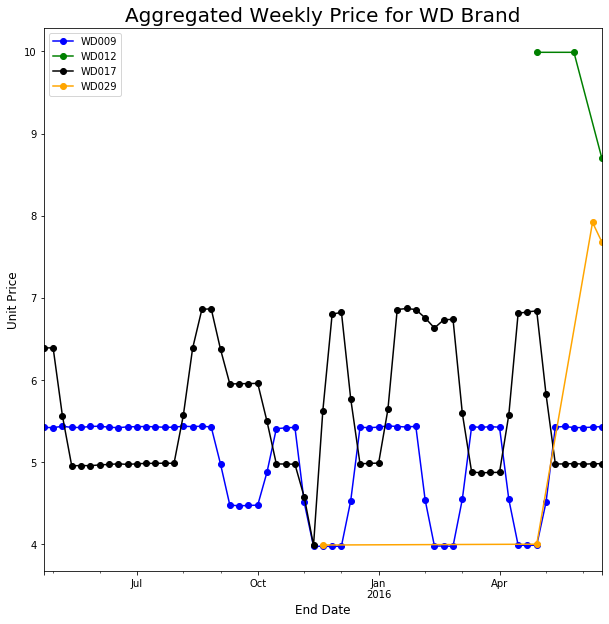

In [100]:
fig,ax=plt.subplots(figsize=(10,10))
cust1_WD009temp['WD009agg_UnitPrice'].plot(color='blue',marker='o',label='WD009')
ax.legend()
cust1_WD012temp['WD012agg_UnitPrice'].plot(color='green',marker='o',label='WD012')
ax.legend()
cust1_WD017temp['WD017agg_UnitPrice'].plot(color='black',marker='o',label='WD017')
ax.legend()
cust1_WD029temp['WD029agg_UnitPrice'].plot(color='orange',marker='o',label='WD029')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Unit Price',fontsize=12)
plt.title("Aggregated Weekly Price for WD Brand",fontsize=20)
plt.show()

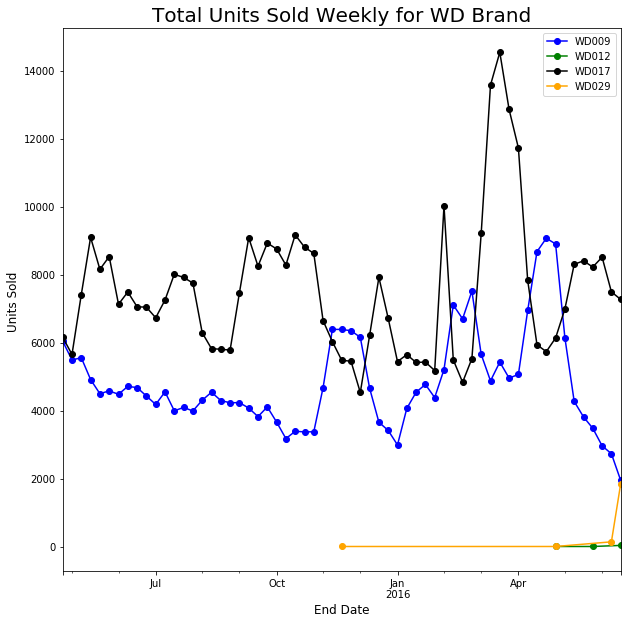

In [101]:
fig,ax=plt.subplots(figsize=(10,10))
cust1_WD009temp['WD009sum_UnitsSold'].plot(color='blue',marker='o',label='WD009')
ax.legend()
cust1_WD012temp['WD012sum_UnitsSold'].plot(color='green',marker='o',label='WD012')
ax.legend()
cust1_WD017temp['WD017sum_UnitsSold'].plot(color='black',marker='o',label='WD017')
ax.legend()
cust1_WD029temp['WD029sum_UnitsSold'].plot(color='orange',marker='o',label='WD029')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Units Sold ',fontsize=12)
plt.title("Total Units Sold Weekly for WD Brand",fontsize=20)
plt.show()

In [102]:
cust1_SP001temp=cust1_SP001.groupby('EndDate').agg(
    SP001sum_UnitsSold=pd.NamedAgg(column='SP001UnitsSold',aggfunc='sum'),
    SP001agg_UnitPrice=pd.NamedAgg(column='SP001UnitPrice',aggfunc='mean')
                             )

In [103]:
cust1_SP001temp.head()

,SP001sum_UnitsSold,SP001agg_UnitPrice
EndDate,,
2015-05-01,3,0.525
2015-05-29,2,0.050
2015-07-03,2,0.050
2015-07-10,2,2.000
2015-07-17,2,0.050


In [104]:
cust1_SPC11temp=cust1_SPC11.groupby('EndDate').agg(
    SPC11sum_UnitsSold=pd.NamedAgg(column='SPC11UnitsSold',aggfunc='sum'),
    SPC11agg_UnitPrice=pd.NamedAgg(column='SPC11UnitPrice',aggfunc='mean')
                             )

In [105]:
cust1_SPC13temp=cust1_SPC13.groupby('EndDate').agg(
    SPC13sum_UnitsSold=pd.NamedAgg(column='SPC13UnitsSold',aggfunc='sum'),
    SPC13agg_UnitPrice=pd.NamedAgg(column='SPC13UnitPrice',aggfunc='mean')
                             )

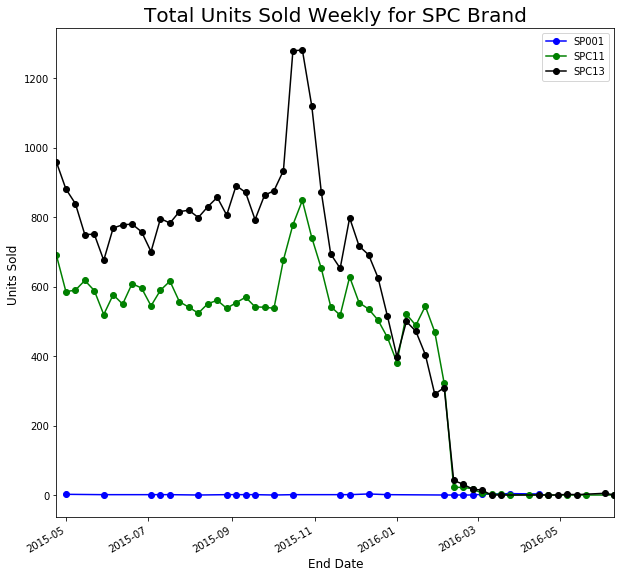

In [106]:
fig,ax=plt.subplots(figsize=(10,10))
cust1_SP001temp['SP001sum_UnitsSold'].plot(color='blue',marker='o',label='SP001')
ax.legend()
cust1_SPC11temp['SPC11sum_UnitsSold'].plot(color='green',marker='o',label='SPC11')
ax.legend()
cust1_SPC13temp['SPC13sum_UnitsSold'].plot(color='black',marker='o',label='SPC13')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Units Sold ',fontsize=12)
plt.title("Total Units Sold Weekly for SPC Brand",fontsize=20)
plt.show()

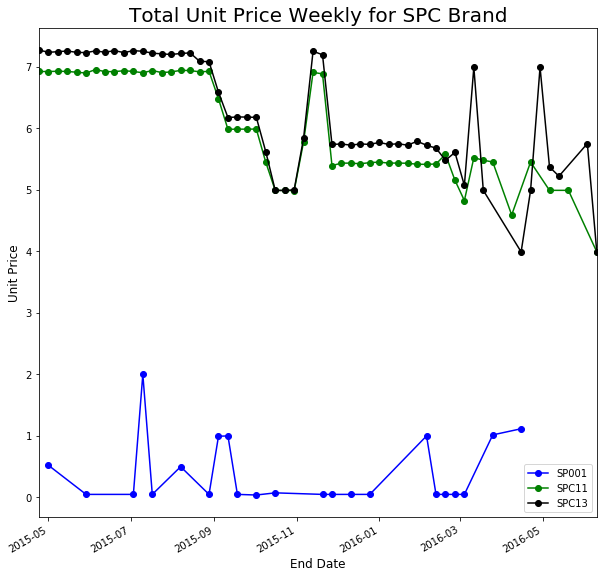

In [107]:
fig,ax=plt.subplots(figsize=(10,10))
cust1_SP001temp['SP001agg_UnitPrice'].plot(color='blue',marker='o',label='SP001')
ax.legend()
cust1_SPC11temp['SPC11agg_UnitPrice'].plot(color='green',marker='o',label='SPC11')
ax.legend()
cust1_SPC13temp['SPC13agg_UnitPrice'].plot(color='black',marker='o',label='SPC13')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Unit Price',fontsize=12)
plt.title("Total Unit Price Weekly for SPC Brand",fontsize=20)
plt.show()

## (v) Point Elasticity Plot

In [108]:
#Calculation of the Percentage Change for Unit Price and Units Sold

In [109]:
pctchangeWD029sum_UnitsSold=cust1_WD029temp['WD029sum_UnitsSold'].pct_change()

In [110]:
pctchangeWD029agg_UnitPrice=cust1_WD029temp['WD029agg_UnitPrice'].pct_change()

In [111]:
cust1_WD029temp['PE_WD029']=pctchangeWD029sum_UnitsSold/pctchangeWD029agg_UnitPrice

In [112]:
cust1_WD029temp

,WD029sum_UnitsSold,WD029agg_UnitPrice,PE_WD029
EndDate,,,
2015-11-20,1,3.990000,NaN
2016-04-29,1,4.000000,0.000000
2016-06-10,138,7.918566,139.847092
2016-06-17,1848,7.680977,-412.988912


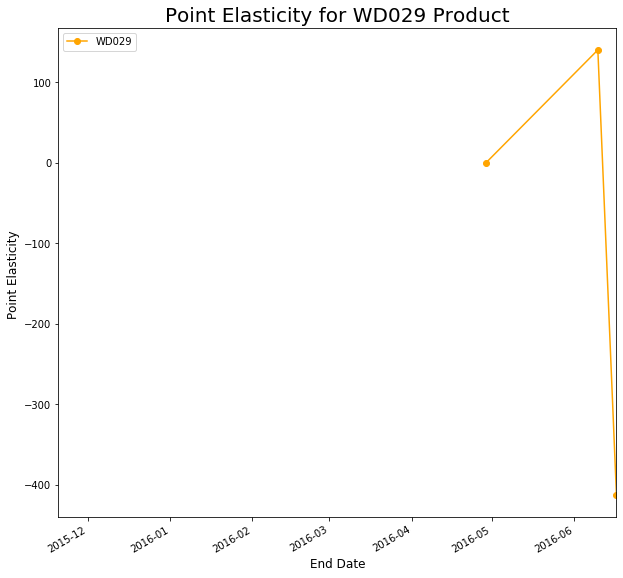

In [113]:
fig,ax=plt.subplots(figsize=(10,10))
cust1_WD029temp['PE_WD029'].plot(color='orange',marker='o',label='WD029')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Point Elasticity ',fontsize=12)
plt.title("Point Elasticity for WD029 Product",fontsize=20)
plt.show()

In [114]:
pctchangeWD009sum_UnitsSold=cust1_WD009temp['WD009sum_UnitsSold'].pct_change()

In [115]:
pctchangeWD009agg_UnitPrice=cust1_WD009temp['WD009agg_UnitPrice'].pct_change()

In [116]:
cust1_WD009temp['PE_WD009']=pctchangeWD009sum_UnitsSold/pctchangeWD009agg_UnitPrice

In [117]:
cust1_WD009temp

,WD009sum_UnitsSold,WD009agg_UnitPrice,PE_WD009
EndDate,,,
2015-04-24,6041,5.422376,NaN
2015-05-01,5487,5.419239,158.515608
2015-05-08,5554,5.436145,3.913976
2015-05-15,4912,5.422119,44.798860
2015-05-22,4495,5.421224,514.725813
...,...,...,...
2016-05-20,3814,5.434674,-57.497323
2016-05-27,3477,5.419556,31.764762
2016-06-03,2963,5.420397,-952.606287


In [118]:
cust1_WD009temp['PE_WD009'].sort_values(ascending=False)

EndDate
2015-05-22    514.725813
2015-07-10    244.355346
2015-07-17    167.215486
2015-05-01    158.515608
2016-01-08    127.092620
                 ...    
2016-06-17   -211.838395
2015-07-31   -224.091832
2016-02-19   -386.204368
2016-06-03   -952.606287
2015-04-24           NaN
Name: PE_WD009, Length: 61, dtype: float64

In [119]:
cust1_WD009temp.drop(cust1_WD009temp[(cust1_WD009temp['PE_WD009']<-300)|(cust1_WD009temp['PE_WD009']>500)].index,inplace=True)

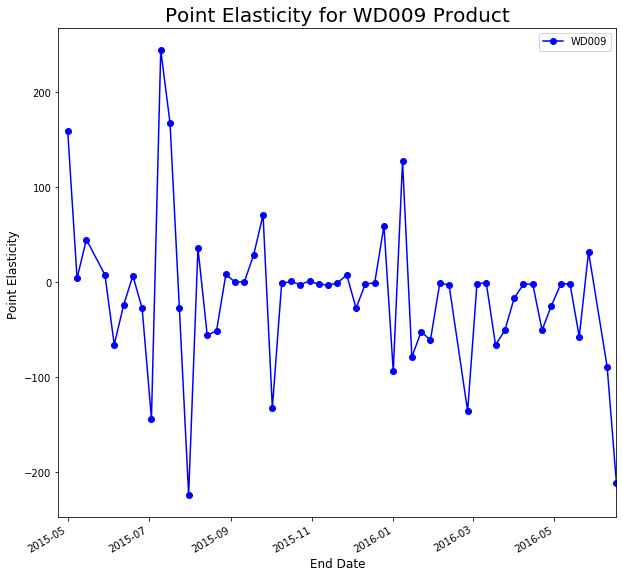

In [120]:
fig,ax=plt.subplots(figsize=(10,10))
cust1_WD009temp['PE_WD009'].plot(color='blue',marker='o',label='WD009')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Point Elasticity ',fontsize=12)
plt.title("Point Elasticity for WD009 Product",fontsize=20)
plt.show()

In [121]:
pctchangeWD012sum_UnitsSold=cust1_WD012temp['WD012sum_UnitsSold'].pct_change()

In [122]:
pctchangeWD012agg_UnitPrice=cust1_WD012temp['WD012agg_UnitPrice'].pct_change()

In [123]:
cust1_WD012temp['PE_WD012']=pctchangeWD012sum_UnitsSold/pctchangeWD012agg_UnitPrice

In [124]:
cust1_WD012temp

,WD012sum_UnitsSold,WD012agg_UnitPrice,PE_WD012
EndDate,,,
2016-04-29,1,9.990000,NaN
2016-05-27,1,9.990000,NaN
2016-06-17,33,8.701538,-248.109851


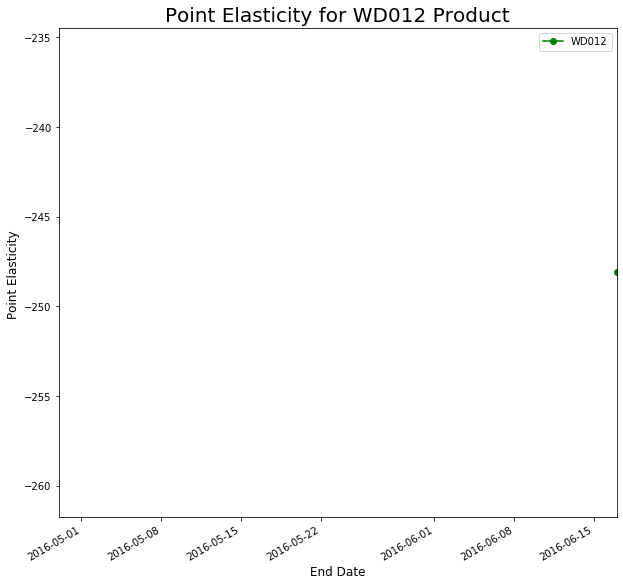

In [125]:
fig,ax=plt.subplots(figsize=(10,10))
cust1_WD012temp['PE_WD012'].plot(color='green',marker='o',label='WD012')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Point Elasticity ',fontsize=12)
plt.title("Point Elasticity for WD012 Product",fontsize=20)
plt.show()

In [126]:
pctchangeWD017sum_UnitsSold=cust1_WD017temp['WD017sum_UnitsSold'].pct_change()

In [127]:
pctchangeWD017agg_UnitPrice=cust1_WD017temp['WD017agg_UnitPrice'].pct_change()

In [128]:
cust1_WD017temp['PE_WD017']=pctchangeWD017sum_UnitsSold/pctchangeWD017agg_UnitPrice

In [129]:
cust1_WD017temp.head()

,WD017sum_UnitsSold,WD017agg_UnitPrice,PE_WD017
EndDate,,,
2015-04-24,6154,6.389708,NaN
2015-05-01,5651,6.391189,-352.651034
2015-05-08,7413,5.562359,-2.404343
2015-05-15,9095,4.953988,-2.074545
2015-05-22,8153,4.957838,-133.291446


In [130]:
cust1_WD017temp.drop(cust1_WD017temp[cust1_WD017temp['PE_WD017']<-1000].index,inplace=True)

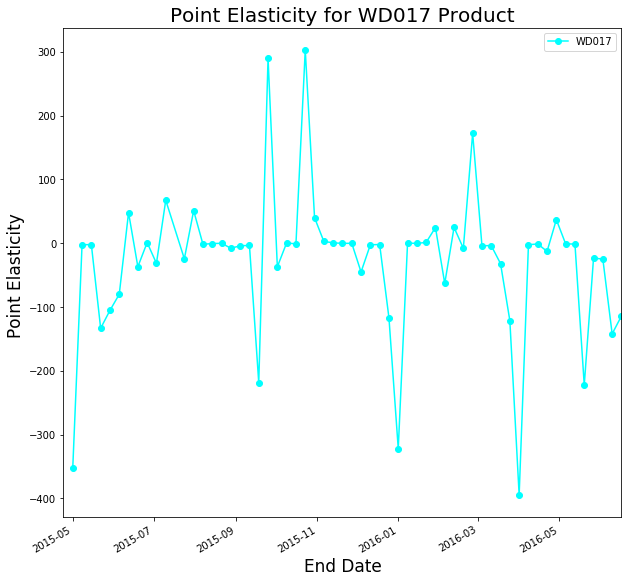

In [131]:
fig,ax=plt.subplots(figsize=(10,10))
cust1_WD017temp['PE_WD017'].plot(color='cyan',marker='o',label='WD017')
ax.legend()
plt.xlabel('End Date',fontsize=17)
plt.ylabel('Point Elasticity ',fontsize=17)
plt.title("Point Elasticity for WD017 Product",fontsize=20)
plt.show()

In [132]:
cust1_WD029temp.describe()

,WD029sum_UnitsSold,WD029agg_UnitPrice,PE_WD029
count,4.000000,4.000000,3.000000
mean,497.000000,5.897386,-91.047273
std,902.979143,2.198830,287.444110
min,1.000000,3.990000,-412.988912
25%,1.000000,3.997500,-206.494456
50%,69.500000,5.840489,0.000000
75%,565.500000,7.740374,69.923546
max,1848.000000,7.918566,139.847092


In [133]:
cust1_WD029temp['PE_WD029'].median()

0.0

In [134]:
cust1_WD029temp['PE_WD029'].mean()

-91.04727333950412

# So Point Elasticity Median value for WD029 is 0 and mean is -91.05

In [135]:
cust1_WD009temp.describe()

,WD009sum_UnitsSold,WD009agg_UnitPrice,PE_WD009
count,58.000000,58.000000,57.000000
mean,4834.672414,5.026800,-13.924453
std,1455.827568,0.570501,77.882438
min,1945.000000,3.972104,-224.091832
25%,4010.250000,4.515773,-51.203011
50%,4538.500000,5.422321,-2.284742
75%,5471.750000,5.430526,3.913976
max,9068.000000,5.441030,244.355346


In [136]:
cust1_WD009temp['PE_WD009'].median()

-2.2847423780820963

# So Point Elasticity Median value for WD009 is -2.28

In [137]:
cust1_WD012temp.describe()

,WD012sum_UnitsSold,WD012agg_UnitPrice,PE_WD012
count,3.000000,3.000000,1.000000
mean,11.666667,9.560513,-248.109851
std,18.475209,0.743894,NaN
min,1.000000,8.701538,-248.109851
25%,1.000000,9.345769,-248.109851
50%,1.000000,9.990000,-248.109851
75%,17.000000,9.990000,-248.109851
max,33.000000,9.990000,-248.109851


In [138]:
cust1_WD012temp['PE_WD012'].median()

-248.1098507462691

# So Point Elasticity Median value for WD012 is same -248.10 across all points

In [139]:
cust1_WD017temp.describe()

,WD017sum_UnitsSold,WD017agg_UnitPrice,PE_WD017
count,60.000000,60.000000,59.000000
mean,7483.966667,5.629835,-27.747470
std,2042.873060,0.804139,114.809528
min,4531.000000,3.985661,-394.729548
25%,5815.750000,4.976985,-36.869836
50%,7259.500000,5.528439,-2.393365
75%,8430.250000,6.390079,0.492540
max,14538.000000,6.870298,303.132417


In [140]:
cust1_WD017temp['PE_WD017'].median()

-2.393364725139294

# So Point Elasticity Median value for WD017 is -2.39

## (vi)Cross Elasticity

In [141]:
#As SP001 has only 1 data point, hence not including it for cross elasticity calculation

In [142]:
cust1SP_aggr=pd.merge(cust1_SPC13temp,cust1_SPC11temp,how='outer',on='EndDate')

In [143]:
cust1SP_aggr.head()

,SPC13sum_UnitsSold,SPC13agg_UnitPrice,SPC11sum_UnitsSold,SPC11agg_UnitPrice
EndDate,,,,
2015-04-24,958.0,7.271472,690.0,6.921240
2015-05-01,881.0,7.232628,586.0,6.920026
2015-05-08,839.0,7.242353,590.0,6.925255
2015-05-15,750.0,7.254055,618.0,6.921631
2015-05-22,751.0,7.232212,589.0,6.909123


In [144]:
#Calculation of cross elasticity of WD009 

In [145]:
cust1_WD009_aggr=pd.merge(cust1_WD009temp,cust1SP_aggr,how='outer',on='EndDate')

In [146]:
cust1_WD009_aggr

,WD009sum_UnitsSold,WD009agg_UnitPrice,PE_WD009,SPC13sum_UnitsSold,SPC13agg_UnitPrice,SPC11sum_UnitsSold,SPC11agg_UnitPrice
EndDate,,,,,,,
2015-04-24,6041.0,5.422376,NaN,958.0,7.271472,690.0,6.921240
2015-05-01,5487.0,5.419239,158.515608,881.0,7.232628,586.0,6.920026
2015-05-08,5554.0,5.436145,3.913976,839.0,7.242353,590.0,6.925255
2015-05-15,4912.0,5.422119,44.798860,750.0,7.254055,618.0,6.921631
2015-05-29,4579.0,5.434496,7.633307,676.0,7.226966,520.0,6.895742
...,...,...,...,...,...,...,...
2016-06-10,2730.0,5.425176,-89.192332,1.0,3.990000,1.0,3.990000
2016-06-17,1945.0,5.432540,-211.838395,NaN,NaN,NaN,NaN
2015-05-22,NaN,NaN,NaN,751.0,7.232212,589.0,6.909123


In [147]:
cust1_WD009_aggr.isna().sum()

WD009sum_UnitsSold    3
WD009agg_UnitPrice    3
PE_WD009              4
SPC13sum_UnitsSold    6
SPC13agg_UnitPrice    6
SPC11sum_UnitsSold    7
SPC11agg_UnitPrice    7
dtype: int64

In [148]:
cust1_WD009_aggr['SPC13agg_UnitPrice'].fillna(value=cust1_WD009_aggr['SPC13agg_UnitPrice'].median(), inplace=True)

In [149]:
cust1_WD009_aggr['SPC11agg_UnitPrice'].fillna(value=cust1_WD009_aggr['SPC11agg_UnitPrice'].median(), inplace=True)

In [150]:
cust1_WD009_aggr.head()

,WD009sum_UnitsSold,WD009agg_UnitPrice,PE_WD009,SPC13sum_UnitsSold,SPC13agg_UnitPrice,SPC11sum_UnitsSold,SPC11agg_UnitPrice
EndDate,,,,,,,
2015-04-24,6041.0,5.422376,NaN,958.0,7.271472,690.0,6.921240
2015-05-01,5487.0,5.419239,158.515608,881.0,7.232628,586.0,6.920026
2015-05-08,5554.0,5.436145,3.913976,839.0,7.242353,590.0,6.925255
2015-05-15,4912.0,5.422119,44.798860,750.0,7.254055,618.0,6.921631
2015-05-29,4579.0,5.434496,7.633307,676.0,7.226966,520.0,6.895742


In [151]:
X_WD009CE=cust1_WD009_aggr.drop(['WD009sum_UnitsSold','PE_WD009','SPC13sum_UnitsSold','SPC11sum_UnitsSold','WD009agg_UnitPrice'],axis=1)
y_WD009CE=cust1_WD009_aggr['WD009sum_UnitsSold']

In [152]:
X_WD009CE.head()

,SPC13agg_UnitPrice,SPC11agg_UnitPrice
EndDate,,
2015-04-24,7.271472,6.921240
2015-05-01,7.232628,6.920026
2015-05-08,7.242353,6.925255
2015-05-15,7.254055,6.921631
2015-05-29,7.226966,6.895742


In [153]:
WD009_CE = ols('np.log(y_WD009CE)~ np.log(X_WD009CE)', data=cust1_WD009_aggr).fit()
print(WD009_CE.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(y_WD009CE)   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.2010
Date:                Sun, 17 May 2020   Prob (F-statistic):              0.819
Time:                        17:21:23   Log-Likelihood:                -9.4324
No. Observations:                  58   AIC:                             24.86
Df Residuals:                      55   BIC:                             31.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.2358 

In [154]:
#

In [155]:
#Calculation of cross elasticity of WD012

In [156]:
cust1_WD012_aggr=pd.merge(cust1_WD012temp,cust1SP_aggr,how='outer',on='EndDate')

In [157]:
cust1_WD012_aggr.shape

(60, 7)

In [158]:
cust1_WD012_aggr.isna().sum()

WD012sum_UnitsSold    57
WD012agg_UnitPrice    57
PE_WD012              59
SPC13sum_UnitsSold     5
SPC13agg_UnitPrice     5
SPC11sum_UnitsSold     6
SPC11agg_UnitPrice     6
dtype: int64

In [159]:
cust1_WD012_aggr['SPC13agg_UnitPrice'].fillna(value=cust1_WD012_aggr['SPC13agg_UnitPrice'].median(), inplace=True)

In [160]:
cust1_WD012_aggr.shape

(60, 7)

In [161]:
#Out of 60, we have 57 data points missing for WD012. Hence not calculating the cross elasticity for this Prouct.

In [162]:
#Calculation of cross elasticity of WD017

In [163]:
cust1_WD017_aggr=pd.merge(cust1_WD017temp,cust1SP_aggr,how='outer',on='EndDate')

In [164]:
cust1_WD017_aggr.head()

,WD017sum_UnitsSold,WD017agg_UnitPrice,PE_WD017,SPC13sum_UnitsSold,SPC13agg_UnitPrice,SPC11sum_UnitsSold,SPC11agg_UnitPrice
EndDate,,,,,,,
2015-04-24,6154.0,6.389708,NaN,958.0,7.271472,690.0,6.921240
2015-05-01,5651.0,6.391189,-352.651034,881.0,7.232628,586.0,6.920026
2015-05-08,7413.0,5.562359,-2.404343,839.0,7.242353,590.0,6.925255
2015-05-15,9095.0,4.953988,-2.074545,750.0,7.254055,618.0,6.921631
2015-05-22,8153.0,4.957838,-133.291446,751.0,7.232212,589.0,6.909123


In [165]:
cust1_WD017_aggr.isna().sum()

WD017sum_UnitsSold    1
WD017agg_UnitPrice    1
PE_WD017              2
SPC13sum_UnitsSold    6
SPC13agg_UnitPrice    6
SPC11sum_UnitsSold    7
SPC11agg_UnitPrice    7
dtype: int64

In [166]:
cust1_WD017_aggr.shape

(61, 7)

In [167]:
cust1_WD017_aggr.drop(cust1_WD017_aggr[cust1_WD017_aggr['WD017agg_UnitPrice'].isnull()].index,inplace=True)

In [168]:
cust1_WD017_aggr['SPC13agg_UnitPrice'].fillna(value=cust1_WD017_aggr['SPC13agg_UnitPrice'].median(), inplace=True)

In [169]:
cust1_WD017_aggr['SPC11agg_UnitPrice'].fillna(value=cust1_WD017_aggr['SPC11agg_UnitPrice'].median(), inplace=True)

In [170]:
cust1_WD017_aggr.head()

,WD017sum_UnitsSold,WD017agg_UnitPrice,PE_WD017,SPC13sum_UnitsSold,SPC13agg_UnitPrice,SPC11sum_UnitsSold,SPC11agg_UnitPrice
EndDate,,,,,,,
2015-04-24,6154.0,6.389708,NaN,958.0,7.271472,690.0,6.921240
2015-05-01,5651.0,6.391189,-352.651034,881.0,7.232628,586.0,6.920026
2015-05-08,7413.0,5.562359,-2.404343,839.0,7.242353,590.0,6.925255
2015-05-15,9095.0,4.953988,-2.074545,750.0,7.254055,618.0,6.921631
2015-05-22,8153.0,4.957838,-133.291446,751.0,7.232212,589.0,6.909123


In [171]:
X_WD017CE=cust1_WD017_aggr.drop(['WD017sum_UnitsSold','WD017agg_UnitPrice','PE_WD017','SPC13sum_UnitsSold','SPC11sum_UnitsSold'],axis=1)
y_WD017CE=cust1_WD017_aggr['WD017sum_UnitsSold']

In [172]:
X_WD017CE.head()

,SPC13agg_UnitPrice,SPC11agg_UnitPrice
EndDate,,
2015-04-24,7.271472,6.921240
2015-05-01,7.232628,6.920026
2015-05-08,7.242353,6.925255
2015-05-15,7.254055,6.921631
2015-05-22,7.232212,6.909123


In [173]:
WD017_CE = ols('np.log(y_WD017CE)~ np.log(X_WD017CE)', data=cust1_WD017_aggr).fit()
print(WD017_CE.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(y_WD017CE)   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8700
Date:                Sun, 17 May 2020   Prob (F-statistic):              0.424
Time:                        17:21:23   Log-Likelihood:               -0.44742
No. Observations:                  60   AIC:                             6.895
Df Residuals:                      57   BIC:                             13.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.2980 

In [174]:
#Calculation of cross elasticity of WD029

In [175]:
cust1_WD029_aggr=pd.merge(cust1_WD029temp,cust1SP_aggr,how='outer',on='EndDate')

In [176]:
cust1_WD029_aggr.head()

,WD029sum_UnitsSold,WD029agg_UnitPrice,PE_WD029,SPC13sum_UnitsSold,SPC13agg_UnitPrice,SPC11sum_UnitsSold,SPC11agg_UnitPrice
EndDate,,,,,,,
2015-11-20,1.0,3.990000,NaN,653.0,7.192578,518.0,6.881419
2016-04-29,1.0,4.000000,0.000000,1.0,6.990000,NaN,NaN
2016-06-10,138.0,7.918566,139.847092,1.0,3.990000,1.0,3.990000
2016-06-17,1848.0,7.680977,-412.988912,NaN,NaN,NaN,NaN
2015-04-24,NaN,NaN,NaN,958.0,7.271472,690.0,6.921240


In [177]:
cust1_WD029_aggr.isna().sum()

WD029sum_UnitsSold    55
WD029agg_UnitPrice    55
PE_WD029              56
SPC13sum_UnitsSold     4
SPC13agg_UnitPrice     4
SPC11sum_UnitsSold     5
SPC11agg_UnitPrice     5
dtype: int64

In [178]:
cust1_WD029_aggr.shape

(59, 7)

In [179]:
#Out of 59, we have 55 data points missing for WD029. Hence not calculating the cross elasticity for this Prouct.

# OLS Model

### Model for WD029

In [180]:
#Model for WD029
X_WD029=cust1_WD029temp['WD029agg_UnitPrice']
y_WD029=cust1_WD029temp['WD029sum_UnitsSold']

In [181]:
WD029_model = ols('np.log(y_WD029)~ np.log(X_WD029)', data=cust1_WD029temp).fit()
print(WD029_model.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(y_WD029)   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     18.36
Date:                Sun, 17 May 2020   Prob (F-statistic):             0.0504
Time:                        17:21:23   Log-Likelihood:                -5.7434
No. Observations:                   4   AIC:                             15.49
Df Residuals:                       2   BIC:                             14.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7197      3.765     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Text(0, 0.5, 'Units Sold')

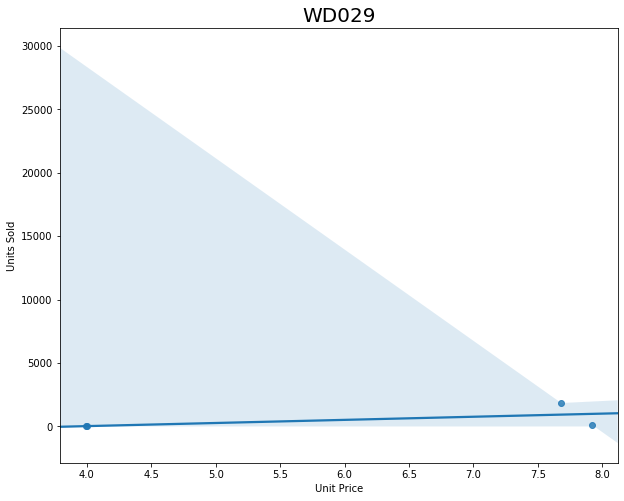

In [182]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD029',fontsize=20)
sns.regplot(x='WD029agg_UnitPrice',y='WD029sum_UnitsSold',data=cust1_WD029temp, ax=ax)
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')

### Coefficient of WD029 is 9.2079

### Model for WD012

In [183]:
#Model for WD012
X_WD012=cust1_WD012temp['WD012agg_UnitPrice']
y_WD012=cust1_WD012temp['WD012sum_UnitsSold']

In [184]:
WD012_model = ols('np.log(y_WD012)~ np.log(X_WD012)', data=cust1_WD012temp).fit()
print(WD012_model.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(y_WD012)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.317e+28
Date:                Sun, 17 May 2020   Prob (F-statistic):           5.55e-15
Time:                        17:21:23   Log-Likelihood:                 91.366
No. Observations:                   3   AIC:                            -178.7
Df Residuals:                       1   BIC:                            -180.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          58.2795   4.98e-13   1.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


Text(0, 0.5, 'Units Sold')

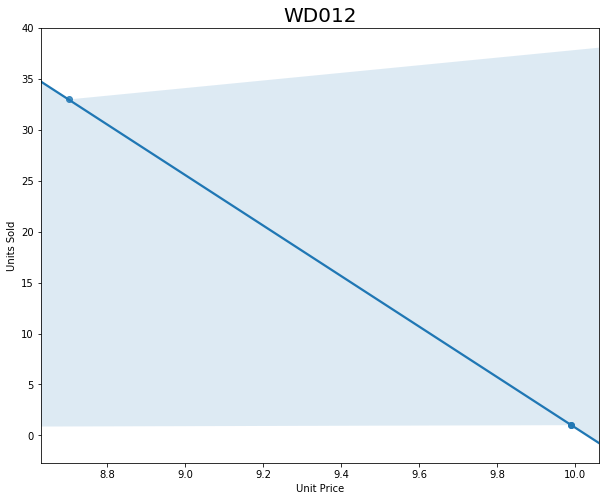

In [185]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD012',fontsize=20)
sns.regplot(x='WD012agg_UnitPrice',y='WD012sum_UnitsSold',data=cust1_WD012temp, ax=ax)
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')

### Coefficient of WD012 is -25.3215

### Model for WD009

In [186]:
#Model for WD009
X_WD009=cust1_WD009temp['WD009agg_UnitPrice']
y_WD009=cust1_WD009temp['WD009sum_UnitsSold']

In [187]:
WD009_model = ols('np.log(y_WD009)~ np.log(X_WD009)', data=cust1_WD009temp).fit()
print(WD009_model.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(y_WD009)   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     38.98
Date:                Sun, 17 May 2020   Prob (F-statistic):           6.09e-08
Time:                        17:21:24   Log-Likelihood:                 5.6778
No. Observations:                  58   AIC:                            -7.356
Df Residuals:                      56   BIC:                            -3.235
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.9071      0.396     

In [188]:
#Inversing the log coefficient 
np.exp(-1.5329)

0.21590862353372808

Text(0, 0.5, 'Units Sold')

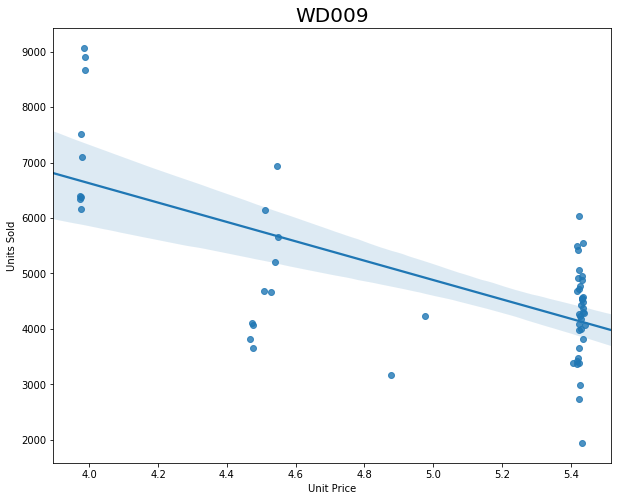

In [189]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD009',fontsize=20)
sns.regplot(x='WD009agg_UnitPrice',y='WD009sum_UnitsSold',data=cust1_WD009temp, ax=ax)
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')

### Coefficient of X_WD009 is   -1.5329

### Model for WD017

In [190]:
#Model for WD017
X_WD017=cust1_WD017temp['WD017agg_UnitPrice']
y_WD017=cust1_WD017temp['WD017sum_UnitsSold']

In [191]:
WD017_model = ols('np.log(y_WD017)~ np.log(X_WD017)', data=cust1_WD017temp).fit()
print(WD017_model.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(y_WD017)   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     24.28
Date:                Sun, 17 May 2020   Prob (F-statistic):           7.30e-06
Time:                        17:21:24   Log-Likelihood:                 9.1413
No. Observations:                  60   AIC:                            -14.28
Df Residuals:                      58   BIC:                            -10.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5396      0.336     

Text(0, 0.5, 'Units Sold')

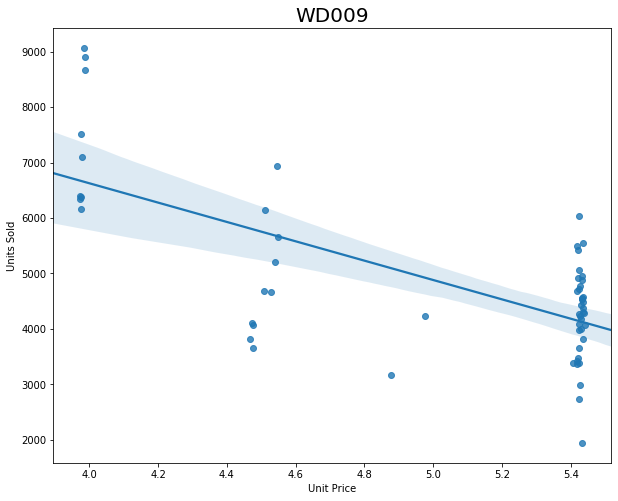

In [192]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD009',fontsize=20)
sns.regplot(x='WD009agg_UnitPrice',y='WD009sum_UnitsSold',data=cust1_WD009temp, ax=ax)
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')

## Coefficient of X_WD017 is -0.961

## Adding prices of other products as features to build a predictive model for WD brand of products

In [193]:
custWDtemp=pd.merge(cust1_WD012temp,cust1_WD009temp,how='outer',on='EndDate')

In [194]:
custWDtemp=pd.merge(custWDtemp,cust1_WD029temp,how='outer',on='EndDate')

In [195]:
custWDtemp=pd.merge(custWDtemp,cust1_WD017temp,how='outer',on='EndDate')

In [196]:
custWDtemp=pd.merge(custWDtemp,cust1SP_aggr,how='outer',on='EndDate')

In [197]:
custWDtemp.head()

,WD012sum_UnitsSold,WD012agg_UnitPrice,PE_WD012,WD009sum_UnitsSold,WD009agg_UnitPrice,PE_WD009,WD029sum_UnitsSold,WD029agg_UnitPrice,PE_WD029,WD017sum_UnitsSold,WD017agg_UnitPrice,PE_WD017,SPC13sum_UnitsSold,SPC13agg_UnitPrice,SPC11sum_UnitsSold,SPC11agg_UnitPrice
EndDate,,,,,,,,,,,,,,,,
2016-04-29,1.0,9.990000,NaN,8901.0,3.988123,-24.915437,1.0,4.000000,0.000000,6134.0,6.841607,37.014233,1.0,6.990000,NaN,NaN
2016-05-27,1.0,9.990000,NaN,3477.0,5.419556,31.764762,NaN,NaN,NaN,8222.0,4.981822,-23.111946,NaN,NaN,NaN,NaN
2016-06-17,33.0,8.701538,-248.109851,1945.0,5.432540,-211.838395,1848.0,7.680977,-412.988912,7269.0,4.980260,-114.097964,NaN,NaN,NaN,NaN
2015-04-24,NaN,NaN,NaN,6041.0,5.422376,NaN,NaN,NaN,NaN,6154.0,6.389708,NaN,958.0,7.271472,690.0,6.921240
2015-05-01,NaN,NaN,NaN,5487.0,5.419239,158.515608,NaN,NaN,NaN,5651.0,6.391189,-352.651034,881.0,7.232628,586.0,6.920026


In [198]:
custWDtemp.drop(custWDtemp[['PE_WD012','PE_WD009','PE_WD029','PE_WD017']],axis=1,inplace=True)

In [199]:
custWDtemp.head()

,WD012sum_UnitsSold,WD012agg_UnitPrice,WD009sum_UnitsSold,WD009agg_UnitPrice,WD029sum_UnitsSold,WD029agg_UnitPrice,WD017sum_UnitsSold,WD017agg_UnitPrice,SPC13sum_UnitsSold,SPC13agg_UnitPrice,SPC11sum_UnitsSold,SPC11agg_UnitPrice
EndDate,,,,,,,,,,,,
2016-04-29,1.0,9.990000,8901.0,3.988123,1.0,4.000000,6134.0,6.841607,1.0,6.990000,NaN,NaN
2016-05-27,1.0,9.990000,3477.0,5.419556,NaN,NaN,8222.0,4.981822,NaN,NaN,NaN,NaN
2016-06-17,33.0,8.701538,1945.0,5.432540,1848.0,7.680977,7269.0,4.980260,NaN,NaN,NaN,NaN
2015-04-24,NaN,NaN,6041.0,5.422376,NaN,NaN,6154.0,6.389708,958.0,7.271472,690.0,6.921240
2015-05-01,NaN,NaN,5487.0,5.419239,NaN,NaN,5651.0,6.391189,881.0,7.232628,586.0,6.920026


In [200]:
custWDtemp.isna().sum()

WD012sum_UnitsSold    58
WD012agg_UnitPrice    58
WD009sum_UnitsSold     3
WD009agg_UnitPrice     3
WD029sum_UnitsSold    57
WD029agg_UnitPrice    57
WD017sum_UnitsSold     1
WD017agg_UnitPrice     1
SPC13sum_UnitsSold     6
SPC13agg_UnitPrice     6
SPC11sum_UnitsSold     7
SPC11agg_UnitPrice     7
dtype: int64

In [201]:
#Imputing the missing value with Median of the respective columns

In [202]:
custWDtemp['WD009agg_UnitPrice'].fillna(value=custWDtemp['WD009agg_UnitPrice'].median(), inplace=True)

In [203]:
custWDtemp['WD017agg_UnitPrice'].fillna(value=custWDtemp['WD017agg_UnitPrice'].median(), inplace=True)

In [204]:
custWDtemp['SPC13agg_UnitPrice'].fillna(value=custWDtemp['SPC13agg_UnitPrice'].median(), inplace=True)

In [205]:
custWDtemp['SPC11agg_UnitPrice'].fillna(value=custWDtemp['SPC11agg_UnitPrice'].median(), inplace=True)

In [206]:
#Removing WD012agg_UnitPrice and WD029agg_UnitPrice as it has very less data

In [207]:
X_WD009New=custWDtemp.drop(['WD029sum_UnitsSold','WD017sum_UnitsSold','WD012sum_UnitsSold','WD009sum_UnitsSold','SPC11sum_UnitsSold','SPC13sum_UnitsSold','SPC11sum_UnitsSold','WD012agg_UnitPrice','WD029agg_UnitPrice'],axis=1)
y_WD009New=custWDtemp['WD009sum_UnitsSold']

In [208]:
X_WD009New.head()

,WD009agg_UnitPrice,WD017agg_UnitPrice,SPC13agg_UnitPrice,SPC11agg_UnitPrice
EndDate,,,,
2016-04-29,3.988123,6.841607,6.990000,5.677357
2016-05-27,5.419556,4.981822,6.172529,5.677357
2016-06-17,5.432540,4.980260,6.172529,5.677357
2015-04-24,5.422376,6.389708,7.271472,6.921240
2015-05-01,5.419239,6.391189,7.232628,6.920026


In [209]:
WD009_modelnew=ols("np.log(y_WD009New)~np.log(X_WD009New)",data=custWDtemp).fit()
print(WD009_modelnew.summary())

                            OLS Regression Results                            
Dep. Variable:     np.log(y_WD009New)   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     12.74
Date:                Sun, 17 May 2020   Prob (F-statistic):           2.46e-07
Time:                        17:21:25   Log-Likelihood:                 9.8981
No. Observations:                  58   AIC:                            -9.796
Df Residuals:                      53   BIC:                            0.5060
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.21

In [210]:
X_WD009New=custWDtemp.drop(['WD029sum_UnitsSold','WD017sum_UnitsSold','WD012sum_UnitsSold','WD009sum_UnitsSold','SPC11sum_UnitsSold','SPC13sum_UnitsSold','SPC11sum_UnitsSold','WD012agg_UnitPrice','WD029agg_UnitPrice','SPC11agg_UnitPrice'],axis=1)
y_WD009New=custWDtemp['WD009sum_UnitsSold']

In [211]:
WD009_modelnew=ols("np.log(y_WD009New)~np.log(X_WD009New)",data=custWDtemp).fit()
print(WD009_modelnew.summary())

                            OLS Regression Results                            
Dep. Variable:     np.log(y_WD009New)   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     16.95
Date:                Sun, 17 May 2020   Prob (F-statistic):           6.96e-08
Time:                        17:21:25   Log-Likelihood:                 9.6029
No. Observations:                  58   AIC:                            -11.21
Df Residuals:                      54   BIC:                            -2.964
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.29

## WD017

In [212]:
X_WD017New=custWDtemp.drop(['WD029sum_UnitsSold','WD017sum_UnitsSold','WD012sum_UnitsSold','WD009sum_UnitsSold','SPC11sum_UnitsSold','SPC13sum_UnitsSold','SPC11sum_UnitsSold','WD012agg_UnitPrice','WD029agg_UnitPrice',],axis=1)
y_WD017New=custWDtemp['WD017sum_UnitsSold']

In [213]:
X_WD017New.head()

,WD009agg_UnitPrice,WD017agg_UnitPrice,SPC13agg_UnitPrice,SPC11agg_UnitPrice
EndDate,,,,
2016-04-29,3.988123,6.841607,6.990000,5.677357
2016-05-27,5.419556,4.981822,6.172529,5.677357
2016-06-17,5.432540,4.980260,6.172529,5.677357
2015-04-24,5.422376,6.389708,7.271472,6.921240
2015-05-01,5.419239,6.391189,7.232628,6.920026


In [214]:
WD017_modelnew=ols("np.log(y_WD017New)~np.log(X_WD017New)",data=custWDtemp).fit()
print(WD017_modelnew.summary())

                            OLS Regression Results                            
Dep. Variable:     np.log(y_WD017New)   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     7.161
Date:                Sun, 17 May 2020   Prob (F-statistic):           0.000103
Time:                        17:21:25   Log-Likelihood:                 11.227
No. Observations:                  60   AIC:                            -12.45
Df Residuals:                      55   BIC:                            -1.983
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.66

In [215]:
#Calculating the Elasticity of individual Product and total elasticity

In [216]:
cust1ini.head()

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
0,2015-04-24,1493,1001,OH,45750.0,11040,811,WD017,2,12.9800,6.4900
1,2015-04-24,1493,1002,OH,43912.0,11016,811,WD009,1,5.4900,5.4900
2,2015-04-24,1493,1002,OH,43912.0,11040,811,WD017,8,48.6696,6.0837
3,2015-04-24,1493,1003,OH,43130.0,11016,811,WD009,1,5.4900,5.4900
4,2015-04-24,1493,1004,OH,43906.0,11040,811,WD017,2,12.9800,6.4900


# Find the total revenue for Cust 1

In [217]:
totalRevenue=cust1ini['AmtSold'].sum()

In [218]:
print("Total Revenue: ",totalRevenue)

Total Revenue:  4326959.543800001


## Calculate the weighted Average

In [219]:
cust1_WD009.head()

,EndDate,WD009UnitsSold,WD009AmtSold,WD009UnitPrice
1,2015-04-24,1,5.49,5.49
3,2015-04-24,1,5.49,5.49
5,2015-04-24,1,5.49,5.49
9,2015-04-24,2,10.98,5.49
10,2015-04-24,1,5.49,5.49


In [220]:
cust1_WD009_wt=cust1_WD009['WD009AmtSold'].sum()/totalRevenue

In [221]:
print('Weight of WD009: ',cust1_WD009_wt)

Weight of WD009:  0.33242545906421456


In [222]:
cust1_WD012_wt=cust1_WD012['WD012AmtSold'].sum()/totalRevenue

In [223]:
print('Weight of WD012: ',format(cust1_WD012_wt,'f'))

Weight of WD012:  0.000072


In [224]:
cust1_WD017_wt=cust1_WD017['WD017AmtSold'].sum()/totalRevenue

In [225]:
print('Weight of WD017: ',cust1_WD017_wt)

Weight of WD017:  0.5784399269196604


In [226]:
cust1_WD029_wt=cust1_WD029['WD029AmtSold'].sum()/totalRevenue

In [227]:
print('Weight of WD029: ',cust1_WD029_wt)

Weight of WD029:  0.003496982568667943


In [228]:
wt_WD=[0.33,0.578,0.0035]

#### As the data points of WD012 is very less and also the weight, hence not considering WD012 for elasticity calculation

In [229]:
## Coefficient of X_WD017 is -0.961

In [230]:
### Coefficient of X_WD009 is  -1.5329

In [231]:
### Coefficient of WD029 is 9.2079

In [232]:
coeff_elast=[-1.5329,-0.961,9.207]

In [233]:
weighted_elasticity=[]

In [234]:
for num1,num2 in zip(wt_WD,coeff_elast):
    weighted_elasticity.append(num1*num2)

In [235]:
print(weighted_elasticity)

[-0.505857, -0.5554579999999999, 0.0322245]


In [236]:
total_elasticity=np.sum(weighted_elasticity)

In [237]:
print('Total Elasticity of WD Product for Customer 1: ',total_elasticity)

Total Elasticity of WD Product for Customer 1:  -1.0290905


# Total Elasticity of WD Product for Customer 1:  -1.029
